In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("CREMP_Pcover_2023_StonyCoralSpecies.csv")

In [16]:
data.head()

,OID_,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Surveyed_all_years,points,...,Pseudodiploria_clivosa,Pseudodiploria_strigosa,Scleractinia,Scolymia_sp,Siderastrea_radians,Siderastrea_siderea,Solenastrea_bournoni,Stephanocoenia_intersepta,Undaria_agaricites_complex,Total_Cover
0,1,1996,1996-07-25,UK,HB,10,Rattlesnake,101,N,479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1996,1996-07-25,UK,HB,10,Rattlesnake,102,N,525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1996,1996-07-25,UK,HB,10,Rattlesnake,103,N,558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1996,1996-07-25,UK,HB,10,Rattlesnake,104,N,446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1996,1996-07-22,UK,HB,11,El Radabob,111,N,450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   OID_                               3918 non-null   int64         
 1   Year                               3918 non-null   int64         
 2   Date                               3912 non-null   datetime64[ns]
 3   Subregion                          3918 non-null   object        
 4   Habitat                            3918 non-null   object        
 5   SiteID                             3918 non-null   int64         
 6   Site_name                          3918 non-null   object        
 7   StationID                          3918 non-null   int64         
 8   Surveyed_all_years                 3918 non-null   object        
 9   points                             3918 non-null   int64         
 10  Acropora_cervicornis               3

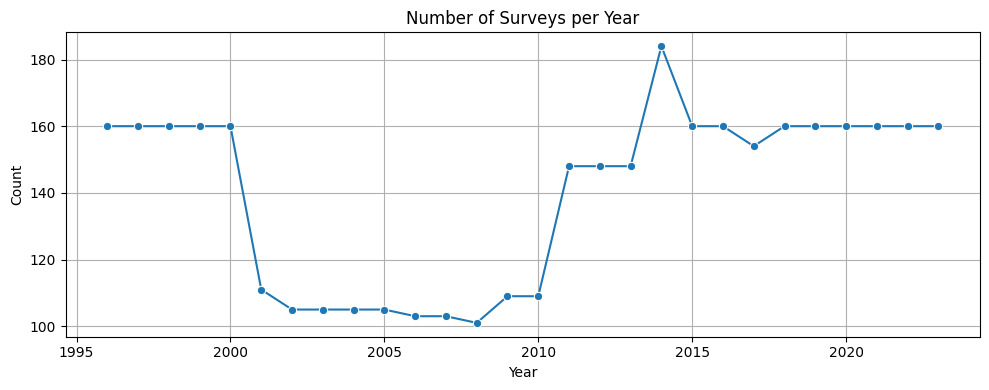

In [8]:
# Convert date column
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Plot number of surveys per year
yearly_counts = data['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Number of Surveys per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

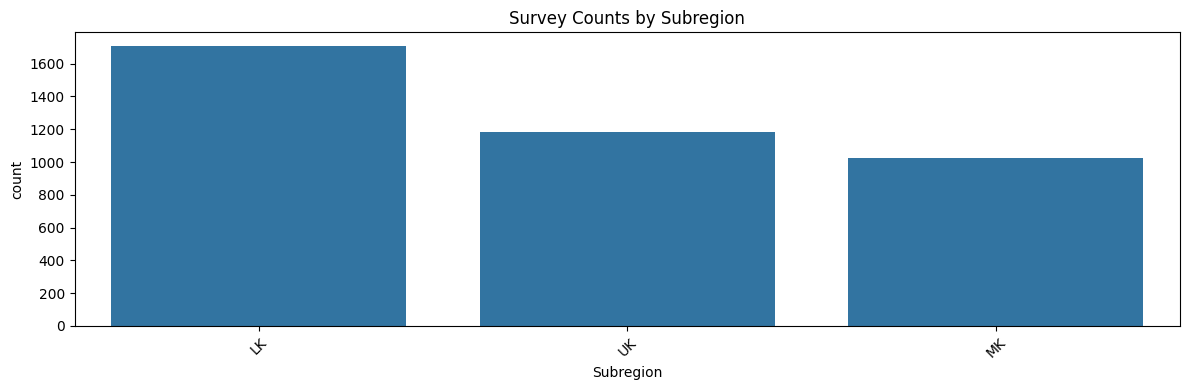

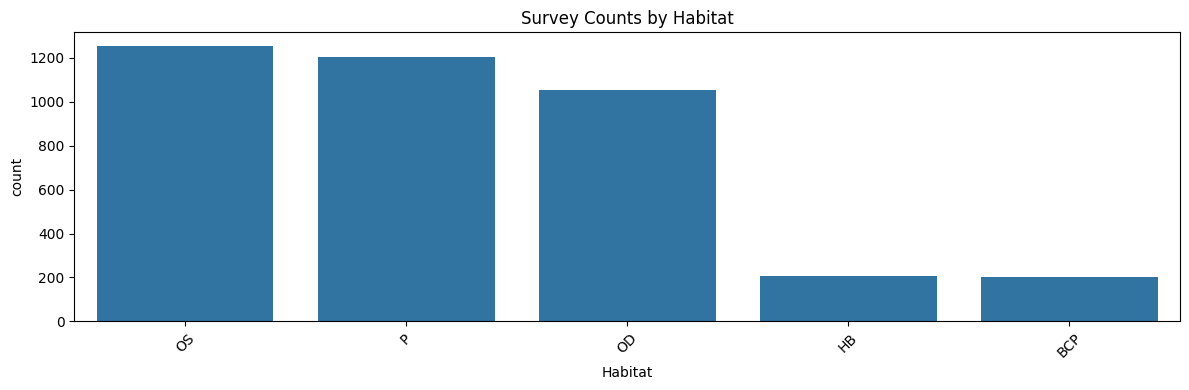

In [10]:
# Spatial Coverage

plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='Subregion', order=data['Subregion'].value_counts().index)
plt.title("Survey Counts by Subregion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='Habitat', order=data['Habitat'].value_counts().index)
plt.title("Survey Counts by Habitat")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

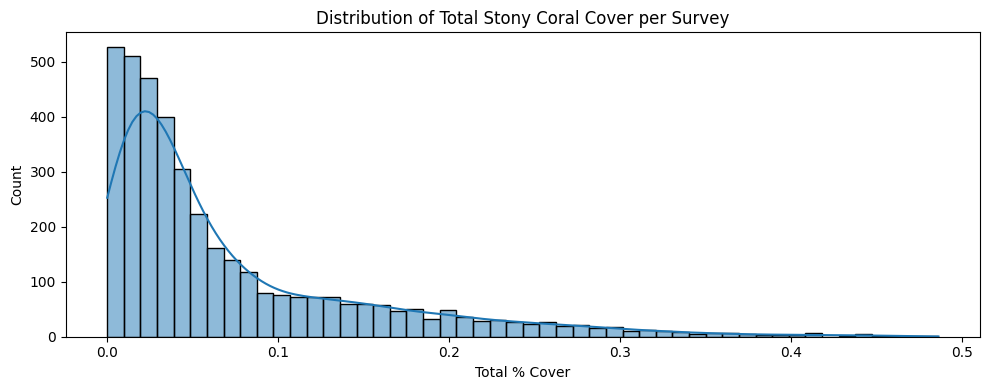

In [12]:
# Total Stony Coral Cover per Survey

species_cols = data.columns[10:]  # 40 species
data['Total_Cover'] = data[species_cols].sum(axis=1)

plt.figure(figsize=(10, 4))
sns.histplot(data['Total_Cover'], bins=50, kde=True)
plt.title("Distribution of Total Stony Coral Cover per Survey")
plt.xlabel("Total % Cover")
plt.tight_layout()
plt.show()

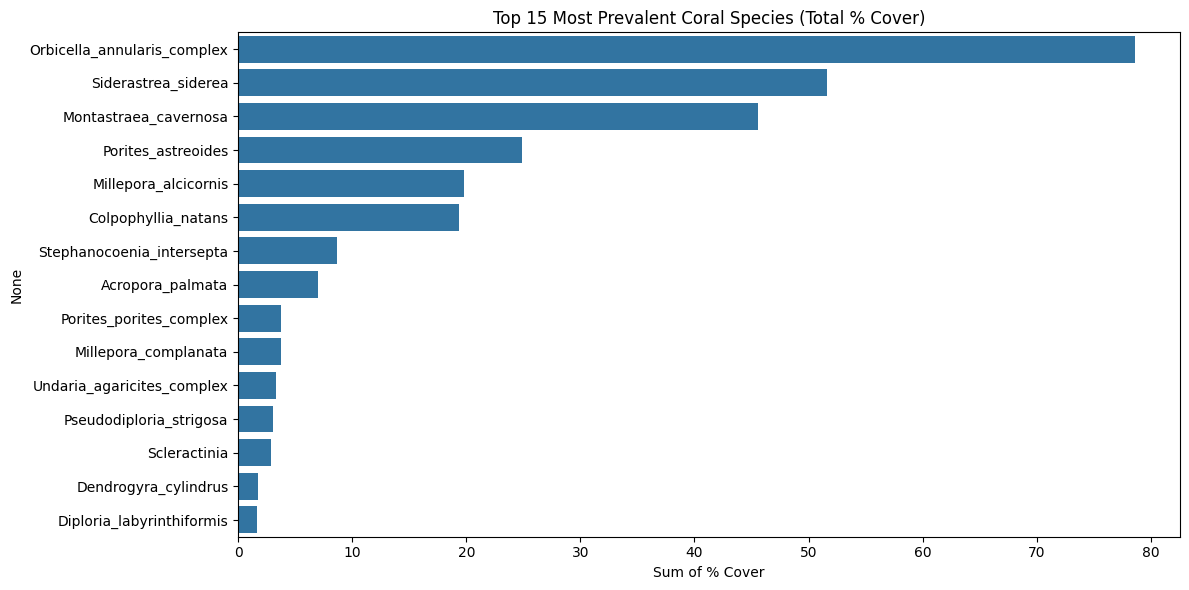

In [22]:
# 🧬 Most Prevalent Coral Species (Across All Years)

species_totals = data[species_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=species_totals.values[:15], y=species_totals.index[:15])
plt.title("Top 15 Most Prevalent Coral Species (Total % Cover)")
plt.xlabel("Sum of % Cover")
plt.tight_layout()
plt.show()

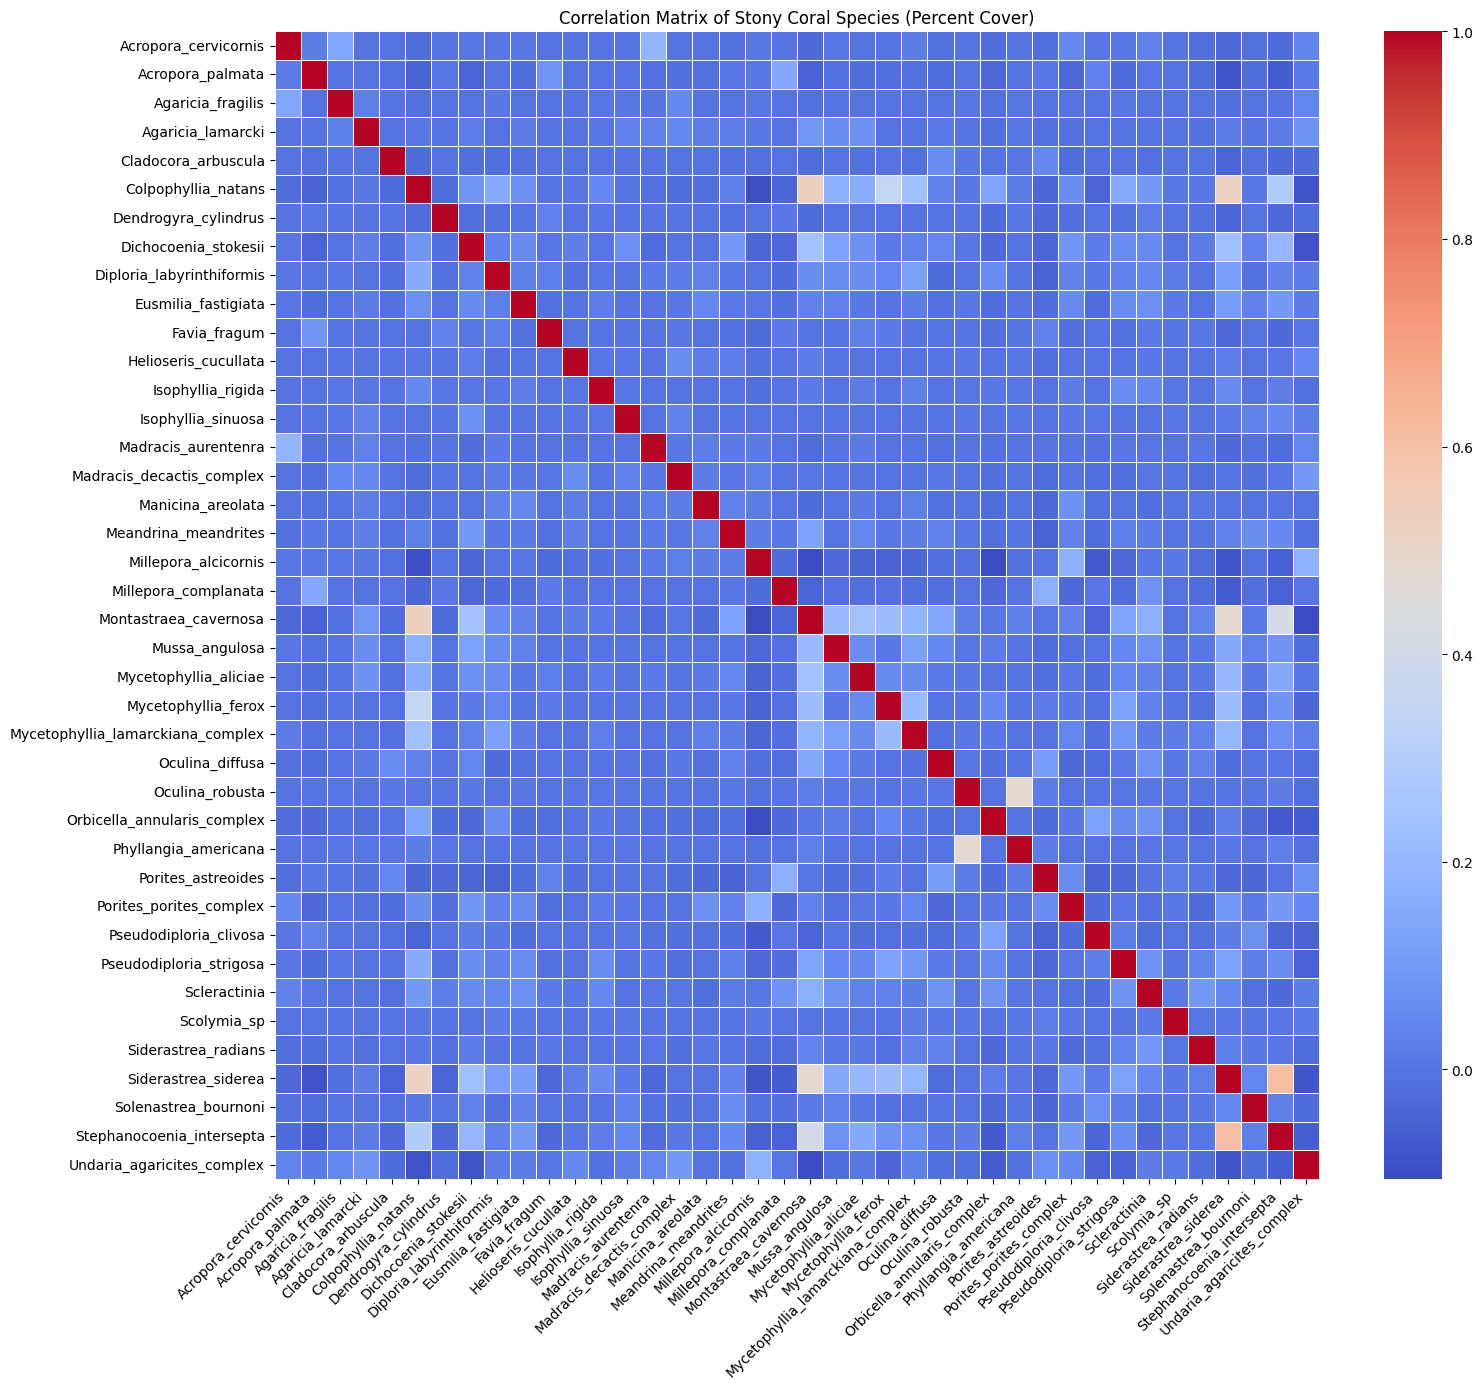

In [24]:
#📊 Correlation Between Coral Species

corr_matrix = data[species_cols].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Stony Coral Species (Percent Cover)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
corr_matrix

,Acropora_cervicornis,Acropora_palmata,Agaricia_fragilis,Agaricia_lamarcki,Cladocora_arbuscula,Colpophyllia_natans,Dendrogyra_cylindrus,Dichocoenia_stokesii,Diploria_labyrinthiformis,Eusmilia_fastigiata,...,Porites_porites_complex,Pseudodiploria_clivosa,Pseudodiploria_strigosa,Scleractinia,Scolymia_sp,Siderastrea_radians,Siderastrea_siderea,Solenastrea_bournoni,Stephanocoenia_intersepta,Undaria_agaricites_complex
Acropora_cervicornis,1.000000,0.017617,0.136434,-0.006520,-0.007983,-0.020195,-0.006678,0.001629,-0.000216,0.001550,...,0.051950,-0.001581,0.003230,0.036069,-0.005550,-0.015012,-0.032046,-0.012996,-0.026651,0.037764
Acropora_palmata,0.017617,1.000000,-0.006544,-0.009549,-0.011691,-0.047391,0.001110,-0.042965,-0.008959,-0.023113,...,-0.035714,0.036257,-0.024434,0.002451,-0.008128,-0.019436,-0.084307,-0.022015,-0.064067,0.011931
Agaricia_fragilis,0.136434,-0.006544,1.000000,0.027370,-0.003428,-0.014052,-0.002872,-0.009073,0.006883,-0.006838,...,-0.007965,-0.006410,-0.001665,-0.009022,-0.002383,-0.007371,-0.016618,-0.006455,-0.005842,0.045282
Agaricia_lamarcki,-0.006520,-0.009549,0.027370,1.000000,-0.005002,0.003164,-0.004191,0.021094,-0.008891,0.017285,...,-0.010495,-0.009353,-0.008224,-0.010132,-0.003477,-0.010755,0.017375,-0.003763,0.015719,0.081710
Cladocora_arbuscula,-0.007983,-0.011691,-0.003428,-0.005002,1.000000,-0.023427,-0.005131,-0.016317,-0.016913,-0.012215,...,-0.019609,-0.011451,-0.009894,-0.010543,-0.004257,-0.006429,-0.043038,-0.011531,-0.027893,-0.026770
Colpophyllia_natans,-0.020195,-0.047391,-0.014052,0.003164,-0.023427,1.000000,-0.021036,0.085164,0.154096,0.069732,...,0.065528,-0.042051,0.156146,0.099781,0.004197,0.009222,0.523691,0.008875,0.291916,-0.085318
Dendrogyra_cylindrus,-0.006678,0.001110,-0.002872,-0.004191,-0.005131,-0.021036,1.000000,-0.018549,-0.014172,-0.010236,...,-0.017160,-0.007705,-0.013144,0.021867,-0.003568,-0.011035,-0.042188,-0.009663,-0.028168,-0.022853
Dichocoenia_stokesii,0.001629,-0.042965,-0.009073,0.021094,-0.016317,0.085164,-0.018549,1.000000,0.034529,0.058215,...,0.088510,0.019475,0.058770,0.057708,-0.002157,0.016989,0.231427,0.035878,0.199163,-0.084406
Diploria_labyrinthiformis,-0.000216,-0.008959,0.006883,-0.008891,-0.016913,0.154096,-0.014172,0.034529,1.000000,0.025767,...,0.034318,0.011159,0.033719,0.049545,0.016520,-0.002273,0.115978,-0.014346,0.036615,0.016214
Eusmilia_fastigiata,0.001550,-0.023113,-0.006838,0.017285,-0.012215,0.069732,-0.010236,0.058215,0.025767,1.000000,...,0.056071,-0.019932,0.061600,0.071530,0.012652,-0.004764,0.109965,0.031250,0.099738,0.019096


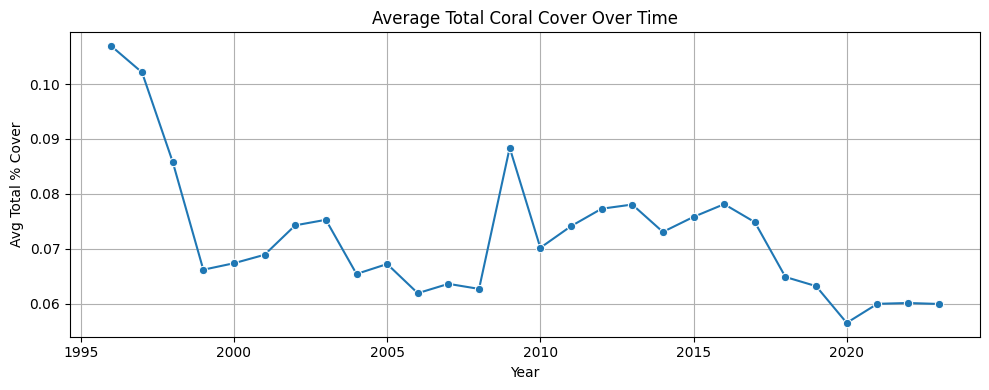

In [28]:
# 📈 Trend of Total Coral Cover Over Time

trend = data.groupby('Year')['Total_Cover'].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=trend.index, y=trend.values, marker='o')
plt.title("Average Total Coral Cover Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Total % Cover")
plt.grid(True)
plt.tight_layout()
plt.show()